In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
from google.colab import files
uploaded = files.upload()

Saving breast-cancer-wisconsin.data to breast-cancer-wisconsin.data


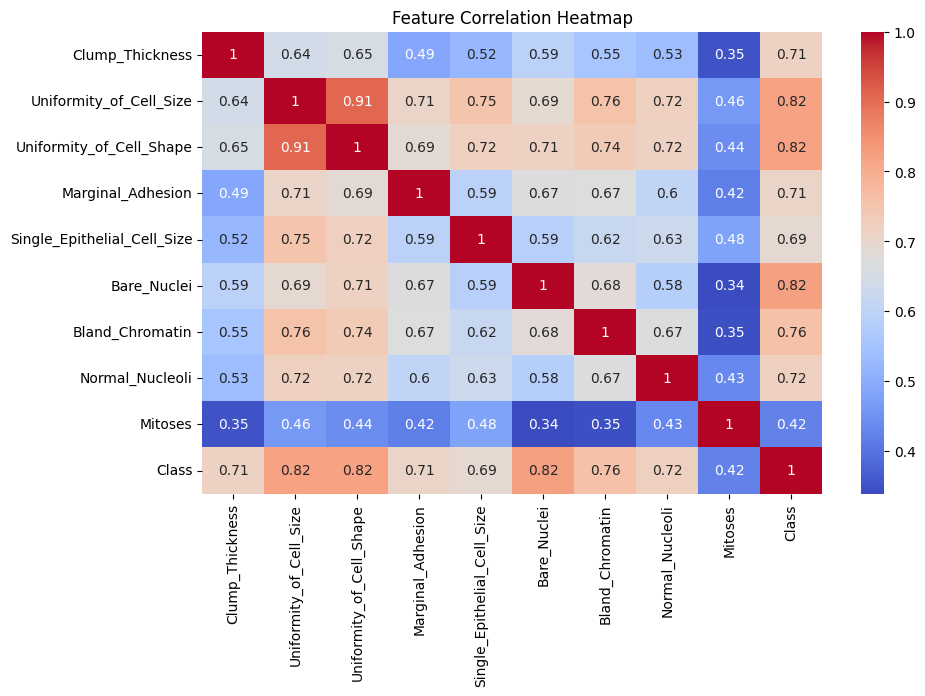

Logistic Regression Accuracy: 0.9590643274853801
Confusion Matrix:
[[106   5]
 [  2  58]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       111
           1       0.92      0.97      0.94        60

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171


KNN (k=5) Accuracy: 0.9532163742690059
Confusion Matrix:
[[106   5]
 [  3  57]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       111
           1       0.92      0.95      0.93        60

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171


Linear SVM Accuracy: 0.9590643274853801
Confusion Matrix:
[[106   5]
 [  2  58]]

Classification Report:
              precisi

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:17:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9707602339181286
Confusion Matrix:
[[106   5]
 [  0  60]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       111
           1       0.92      1.00      0.96        60

    accuracy                           0.97       171
   macro avg       0.96      0.98      0.97       171
weighted avg       0.97      0.97      0.97       171



Results saved to model_results.csv


In [5]:
# Define column names
column_names = [
    "Sample_code_number", "Clump_Thickness", "Uniformity_of_Cell_Size",
    "Uniformity_of_Cell_Shape", "Marginal_Adhesion", "Single_Epithelial_Cell_Size",
    "Bare_Nuclei", "Bland_Chromatin", "Normal_Nucleoli", "Mitoses", "Class"
]

# Load the dataset
df = pd.read_csv("breast-cancer-wisconsin.data", names=column_names, header=None, na_values="?")

# Drop missing values
df.dropna(inplace=True)

# Drop the 'Sample_code_number' column if it exists
if "Sample_code_number" in df.columns:
    df.drop(columns=["Sample_code_number"], inplace=True)

# Convert the target variable to binary labels
df["Class"] = df["Class"].map({2: 0, 4: 1})

# Convert all columns to numeric
df = df.apply(pd.to_numeric)

# Data visualization
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Splitting the data
X = df.drop(columns=["Class"])
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "Linear SVM": SVC(kernel="linear"),
    "Kernel SVM (RBF)": SVC(kernel="rbf"),
    "Naïve Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest (10 estimators)": RandomForestClassifier(n_estimators=10),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    results[name] = {
        "Accuracy": accuracy,
        "Confusion Matrix": conf_matrix,
        "Classification Report": class_report
    }

    print(f"{name} Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{conf_matrix}\n")
    print(f"Classification Report:\n{class_report}\n")

# Save results to a file
results_df = pd.DataFrame({k: v["Accuracy"] for k, v in results.items()}, index=["Accuracy"]).T
results_df.to_csv("model_results.csv")
print("\nResults saved to model_results.csv")